# Exponentielle Glättung -- rekursiv

Definition der exponentiellen Glättung: 

$$
y_{t}^{*}=\alpha \cdot y_{t}+(1-\alpha )\cdot y_{t-1}^{*}
$$

mit:

$$
y_{t-1}^{*}=\alpha \cdot y_{t-1}+(1-\alpha )\cdot y_{t-2}^{*}
$$

folglich:

$$
\displaystyle y_{t}^{*}=\alpha y_{t}+\alpha (1-\alpha )y_{t-1}+\alpha (1-\alpha )^{2}y_{t-2}+\dotsb +\alpha (1-\alpha )^{t-1}y_{1}+(1-\alpha )^{t}y_{0}^{*}
$$

* $y_{t}^{*}$: Vorhersagewert zum Zeitpunkt t, d.h. Vorhersage für t+1
* $y_{t}$: Beobachteter Wert zum Zeitpunkt t.
* $\alpha$: Glättungsfaktor.
    * $\alpha=1$: Vorhersage entspricht Beobachtungswert (keine Glättung).
    * $\alpha=0$: Vergangene Vorhersage wird übernommen (*Anfangswertproblem*).
* *Anfangsproblem*: für $y_{0}^{*}$ gibt es keinen Vorläufer. Deshalb wird festsgelegt: $y_{0}^{*}=y_{0}$.
 

In [10]:
%reset -f

import pandas as pd
import matplotlib.pyplot as plt

(563, 2)

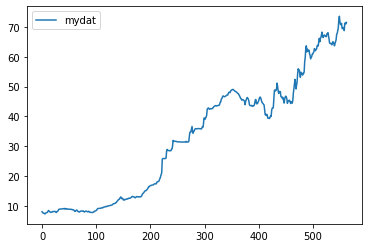

In [15]:
fn = 'data/demo_exi.csv'

df = pd.read_csv(fn)
df.plot()
plt.show

df.shape

In [16]:
# repetition (just for fun)

df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df = df.drop(['date'], axis=1)

0
(563, 1)


<Axes: xlabel='date'>

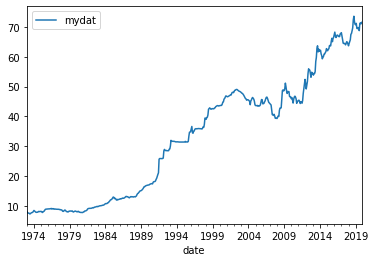

In [18]:
dg = df.resample('MS').agg('mean').copy()
print(dg['mydat'].isnull().sum())
print(dg.shape)
dg.plot()

Jeder Wert wird individuell rekursiv berechnet.

Wie würden die Wert in einem Produktivsystem ebenfalls rekursiv berechnet werden?

In [26]:
alpha = 1
sizedemo = 50

def exp_gl_recurs(arr, alpha):
    if len(arr) == 1:
        return arr[0]
    return alpha * arr[-1] + (1-alpha) * exp_gl_recurs(arr[:-1], alpha)

dfdemo = dg.iloc[:sizedemo,:].copy()

myewm=[]
for i in range(1,len(dfdemo)+1):
    #print(dfdemo.iloc[:i,0].to_numpy())
    myewm.append(exp_gl_recurs(dfdemo.iloc[:i,0].to_numpy(), alpha))
#myewm

In [27]:
dfdemo['myewm'] = myewm
dfdemo['ewm'] = dfdemo['mydat'].ewm(alpha=alpha, adjust=False).mean()


<Axes: xlabel='date'>

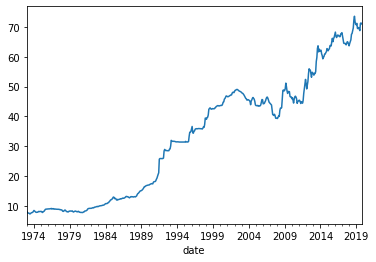

In [28]:
dfdemo['mydat'].plot()

<Axes: xlabel='date'>

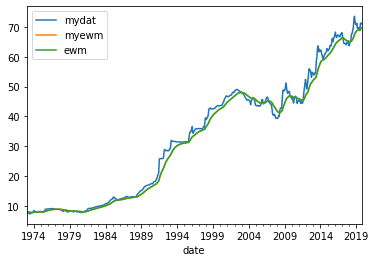